<a href="https://colab.research.google.com/github/Yugandhartripathi/AutomaticHelmetAndLicensePlateRecognitionSystem/blob/master/HELMET_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Training Code

In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K


# dimensions of our images.
img_width, img_height = 224,224

train_data_dir = 'drive/My Drive/MINOR/finalOutputs/TrainModel'

epochs = 50
batch_size = 16

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

history = model.fit_generator(
    train_generator,
    steps_per_epoch=161 // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=161 // batch_size)

model.save_weights('drive/My Drive/MINOR/HelmetModelExtended.h5')

Found 161 images belonging to 2 classes.
Found 161 images belonging to 2 classes.
Epoch 1/50
10/10 [==============================] - 31s 3s/step - loss: 0.9296 - acc: 0.5458 - val_loss: 0.6961 - val_acc: 0.4500
Epoch 2/50
10/10 [==============================] - 16s 2s/step - loss: 0.7327 - acc: 0.4795 - val_loss: 0.6940 - val_acc: 0.5310
Epoch 3/50
10/10 [==============================] - 16s 2s/step - loss: 0.7225 - acc: 0.4668 - val_loss: 0.6906 - val_acc: 0.6138
Epoch 4/50
10/10 [==============================] - 15s 2s/step - loss: 0.7003 - acc: 0.5773 - val_loss: 0.6929 - val_acc: 0.4759
Epoch 5/50
10/10 [==============================] - 16s 2s/step - loss: 0.7205 - acc: 0.5332 - val_loss: 0.6917 - val_acc: 0.5517
Epoch 6/50
10/10 [==============================] - 17s 2s/step - loss: 0.7033 - acc: 0.5250 - val_loss: 0.6898 - val_acc: 0.5241
Epoch 7/50
10/10 [==============================] - 16s 2s/step - loss: 0.8562 - acc: 0.5647 - val_loss: 0.6836 - val_acc: 0.5862
Epoch 8/

Visualisation

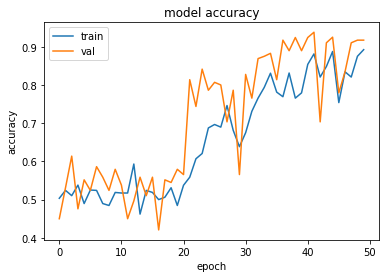

In [0]:
import keras
from matplotlib import pyplot as plt
#history = model1.fit(train_x, train_y,validation_split = 0.1, epochs=50, batch_size=4)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [0]:
train_generator.class_indices

{'trainHelmet': 0, 'trainNonHelmet': 1}

# Testing


In [0]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Load Model

In [0]:
img_width, img_height = 224,224


if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)
    
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
model.load_weights('drive/My Drive/MINOR/HelmetModelExtended.h5')





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where








Non-Helmet


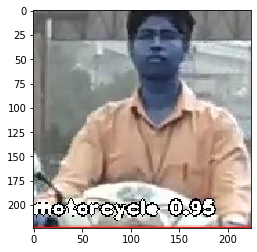

Non-Helmet


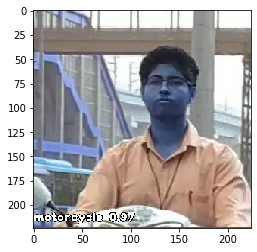

Non-Helmet


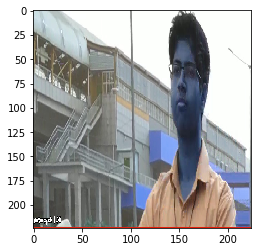

Non-Helmet


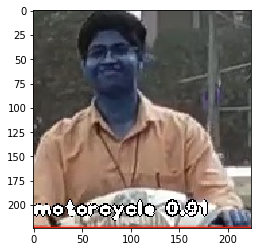

Non-Helmet


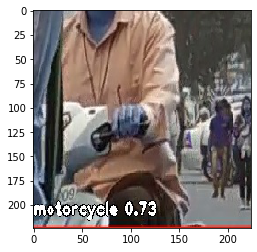

Non-Helmet


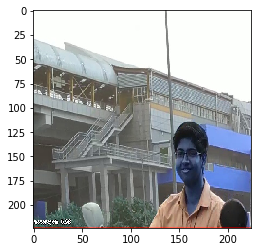

Non-Helmet


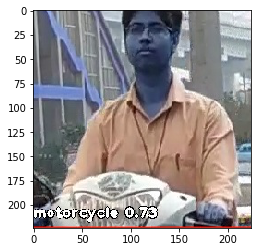

Non-Helmet


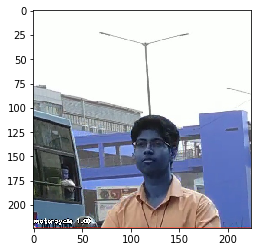

Non-Helmet


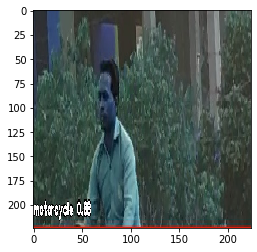

Non-Helmet


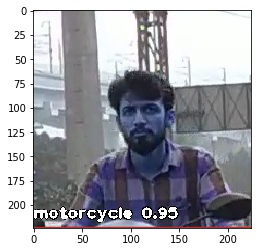

Non-Helmet


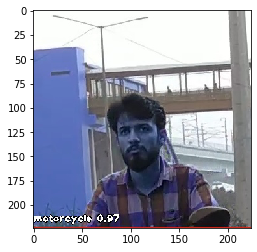

Non-Helmet


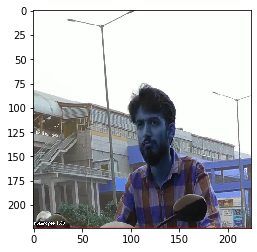

Non-Helmet


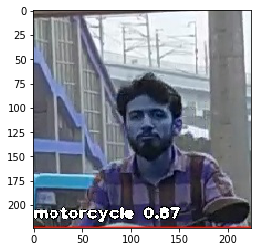

Non-Helmet


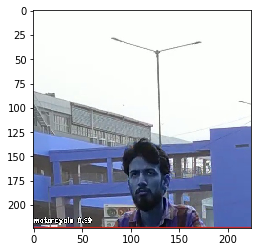

Non-Helmet


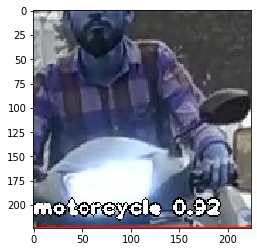

Non-Helmet


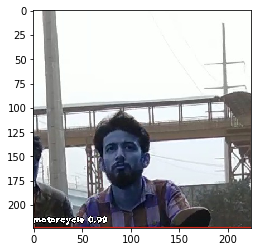

16 16


In [0]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import numpy as np
import matplotlib.pyplot as plt
#numHelmets = 400
#manualList2 = [93,95,96,98,253,256,258,259,261,308,309,324,325,326,327,328,329,330,339,340,341,342,343,400,401,404]
manualListHel = [3,6,8,16,20,23,27,29,33,34,35,326,329,330,331]
manualListHel2 = [2,6,7,8,9,16,17,18,20,21,22,24,27,34,35,36,39,40,42,43,44,45,46,48,49,50,51,53,54,60]
manualListHel3 = [1,6,7,9,10,11,12,13,15,18,21,24,26,27,28,29,33,35,38,40,44,45,48,49,50,54,56]
manualListNhel2 = [10,11,13,14,15,30,31,32,33,47,55,56,57,58]
manualListNhel3 = [2,4,5,19,20,22,30,31,39,41,42,43,52,53,69,70]
manualListNhel = [5,10,11,12,13,17,21,30,32,93,95,96,98,253,256,258,259,261,308,309,324,325,326,327,328,329,330,339,340,341,342,343,400,401,404]
ctr=0
for x in manualListNhel3:
  image_path="drive/My Drive/MINOR/finalOutputs/TrainModel/trainNonHelmet/helmet3-"+str(x)+".jpg"
  img = load_img(image_path, target_size=(224,224))
  plt.imshow(img)
  img = np.expand_dims(img, axis=0)
  result=model.predict_classes(img)
  res = ['Helmet','Non-Helmet']
  if result[0][0]==1:
    ctr+=1
  print(res[result[0][0]])
  plt.show()
print(ctr,len(manualListNhel3))

Non-Helmet


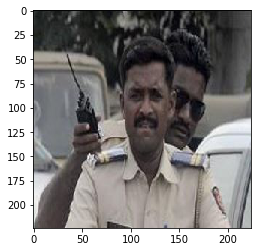

In [0]:
image_path="drive/My Drive/MINOR/finalOutputs/Capture3.JPG"
img = load_img(image_path, target_size=(224,224))
plt.imshow(img)
img = np.expand_dims(img, axis=0)
result=model.predict_classes(img)
res = ['Helmet','Non-Helmet']
if result[0][0]==1:
  ctr+=1
print(res[result[0][0]])
plt.show()

In [0]:
import plotly.figure_factory as ff

#Confusion Matrix
cm = [[0,72],[59,30]]

x=['Helmet Pred','Non Helmet Pred']
y=['Non Helmet Actual','Helmet Actual']

z = cm

z_text = cm
colorSchemes = ['aggrnyl', 'agsunset', 'algae', 'amp', 'armyrose', 'balance',
             'blackbody', 'bluered', 'blues', 'blugrn', 'bluyl', 'brbg',
             'brwnyl', 'bugn', 'bupu', 'burg', 'burgyl', 'cividis', 'curl',
             'darkmint', 'deep', 'delta', 'dense', 'earth', 'edge', 'electric',
             'emrld', 'fall', 'geyser', 'gnbu', 'gray', 'greens', 'greys',
             'haline', 'hot', 'hsv', 'ice', 'icefire', 'inferno', 'jet',
             'magenta', 'magma', 'matter', 'mint', 'mrybm', 'mygbm', 'oranges',
             'orrd', 'oryel', 'peach', 'phase', 'picnic', 'pinkyl', 'piyg',
             'plasma', 'plotly3', 'portland', 'prgn', 'pubu', 'pubugn', 'puor',
             'purd', 'purp', 'purples', 'purpor', 'rainbow', 'rdbu', 'rdgy',
             'rdpu', 'rdylbu', 'rdylgn', 'redor', 'reds', 'solar', 'spectral',
             'speed', 'sunset', 'sunsetdark', 'teal', 'tealgrn', 'tealrose',
             'tempo', 'temps', 'thermal', 'tropic', 'turbid', 'twilight',
             'viridis', 'ylgn', 'ylgnbu', 'ylorbr', 'ylorrd']
xcs = len(colorSchemes)
import random
indcs = random.randint(0,xcs)
cs = colorSchemes[indcs]
print(cs)
fig = ff.create_annotated_heatmap(z, x=x, y=y, annotation_text=z_text, colorscale=cs)
fig.show()

purd
